<a href="https://colab.research.google.com/github/xgpo-2226/EFFDL_Semaine1/blob/main/Labsheets/Core/L2_Sensors_SEMTM0042_43.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Labsheet 2: Sensors

**Aims:**

In this labsheet we will learn about:

- The steps to follow to identify the pins a sensor is attached to, and how to read it.
- Reading two different types of sensors, the infra-red (IR) surface reflectance sensors, and the magnetometer.
- Built in Arduino functions `analogRead()`, `pinMode()` and the $i^2c$ library 'Wire.h'.
- How and why to calibrate sensors.

**Objectives:**

We need the IR surface reflectance sensors to:
 - **Beginner Difficulty:** to detect the boundary of the coursework map whilst the robot actively searches the area for 4 minutes.
 - **Intermediate Difficulty:** to detect the boundary of the coursework map so that the robot (a) knows when the puck has been pushed out of the coursework map (b) so that the robot does not leave the coursework map.
 - **Expert Difficulty:** it is possible to complete the coursework without the IR surface reflectance sensors.

 We need the magnetometer to:
 - **Beginner Difficulty:** you can complete the coursework without operating the magnetometer.
 - **Intermediate & Expert Difficulty:** you will need to use the magnetometer to detect when the puck is infront of the robot.



**Context:**

In labsheet 1 we learnt basic techniques to get the robot to move around.  In this labsheet we will learn how to read in information (via sensors) from the environment.  The final exercises in this labsheet will ask you to combine your work so that reading sensors is used to inform and govern the safe operation of your robot.  

After this labsheet, you should have achieved a very simply implementation of the **three core robotics primitives: sense, plan, act.**

We will discover in this labsheet that:
- Sensors typically have different responses, such as an **offset** or **bias** to their expected signal.
- Sensors will have **noise** in their signal, which can be **random**, **systematic**, or both.
- We can attempt to **mitigate** the effects of both different sensor response and noise through **calibration**.
- Sensors are more convenient to work with if we **normalise** their output.
- Often, it is not enough to consider the only sensor.  We must also consider how the sensor interacts with other parts of the robot or task environment.

<hr><br><br><br><br>


# Infra-Red Surface Reflectance Sensors (Line Sensors)


In this section we will learn about the infra-red (IR) surface reflectance sensors.  Because we will use them for detecting lines, it is more convenient to simply refer to them as **line sensors**.  

On the 3Pi+ the line sensors are 5 sensors facing down toward the surface.  These are visible on the underside of the robot as small black plastic blocks with two small bumps.  Their positions are shown in the following image:

<p align="center">
<br>
<img src="https://github.com/paulodowd/SEMTM0042_43/blob/main/Images/3PI_BottomAnnotated.png?raw=true">
<br>
</p>










<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/info.png" align="left"> **Information:** There are two techniques to read these sensors. In this labsheet, the easiest approach is described.  This "easy" approach is sufficient to complete Assessment 1.  The disadvantage of this approach is that it produces a relatively poor signal (quantity of information).  A better approach is described in the **Supplementary Labsheets**, and could be the subject of study for Assessment 2.

<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/tick.png" align="left">  You are in control of your learning.  Remember to read ahead in the labsheets and make smart decisions about where to focus your time.

<hr><br><br><br><br>



# <img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/theory.png" align="left">  Reading Line Sensors via the Analog-to-Digital Converter (ADC)

The general theory of operation for the line sensors is that they:
- a <a href="https://en.wikipedia.org/wiki/Light-emitting_diode">Light Emitting Diode (LED)</a> emits infra-red (IR) light downward, which strikes the surface and reflects back.
- <a href="https://en.wikipedia.org/wiki/Photodiode">photo-diodes</a> are used to make a measurement of the intensity of the reflection.
<p align="center">
<br>
<img width="50%" src="https://github.com/paulodowd/SEMTM0042_43/blob/main/Images/3PI_DN_ReflectanceHalf.png?raw=true">
<br>
</p>

In Arduino, reading an analogue voltage is almost as simple as using one line of code: `analogRead()`:

```c
  // Somewhere to store the result
  int my_adc_read;

  // read the sensor, attached to pin 'A0'
  my_adc_read = analogRead(A0);
```

When calling this `analogRead()`, an internal peripheral called the `ADC` will be instructed to operate.  The ADC will attempt to compare the voltage on a specified pin of the microcontroller against a reference voltage source.  

We can only use the `ADC` on specific pins, and these are labelled within Arduino as `A0`, `A1`, `A2`, etc.  Within our 3Pi+, the reference voltage is configured as the 5volt supply by default.  So the next logical step is to find out which pins the line sensors are connected to.

<p align="center">
<img src="https://github.com/paulodowd/SEMTM0042_43/blob/main/Images/3PI_PololuPinAssignments_LineBump.png?raw=true">
</p>

The <a href="https://www.pololu.com/docs/0J83/5.9">Pololu documentation on pin assignment</a> lists the following:
- `A11`, Line Sensor 1 (DN1, leftmost)
- `A0`, Line Sensor 2 (DN2)
- `A2`, Line Sensor 3 (DN3, centre)
- `A3`, Line Sensor 4 (DN4)
- `A4`, Line Sensor 5 (DN5, rightmost)

In the above, `A11`, `A0` (etc) are Arduino specified pin names.  These are used as a type of "find and replace" so that the code you write within Arduino could be used on different microcontrollers.  This is why it is important that you select the correct `Board` (for us, Arduino Leonardo) when using the Arduino IDE.  

The Arduino IDE will take `A0` (for example) and map it to the actual hardware pin (`PF7`, "port F bit 7", <a href="https://www.pololu.com/docs/0J83/5.9">according to the Pololu documentation</a>).  Sometimes, you will see that a single pin will have more than one Arduino pin name.  As above, `A0` is also referred to as `18` - here, a good general rule is to use the `An` pin names when reading analogue pins, and otherwise use the numbered names (e.g. `18`) for all other digital operations.

It is also important to remember that we are only programming the microcontroller, which is a small semi-conductor chip.  The 3Pi+ we are programming is using the Atmega 32U4 microcontroller, which has 44 pins in total.  Someone had to decide how to connect these pins.  This chip is highlighted in the below image:

<p align="center">
<img src="https://github.com/paulodowd/SEMTM0042_43/blob/main/Images/microcontroller_to_sensor.png?raw=true">
</p>

In the above image, the dashed-box in pink is where the microcontroller is located - the part that we program with code.  The rest of the circuit board is supporting electronics for power, data transfer, sensors, motors, etc.  

The pink line is only an illustration that one of the pins of the microcontroller has been "wired" to the sensor.  Every robot (or device) you encounter will connect different pins to different sensors, actuators, or other **peripheral devices**.

If we go ahead and try to make an `analogRead()` of the line sensors it won't work.  You could try the following code:

```c

// The pin used to activate the IR LEDs
#define EMIT_PIN 11

void setup() {
   
   // configure the central line sensor pin
   // as input.
   pinMode(A2, INPUT);

   // Configure the EMIT pin as output and
   // high.  This will active some infra-red
   // (IR) LEDs for our sensors to read.
   pinMode( EMIT_PIN, OUTPUT );
   digitalWrite( EMIT_PIN, HIGH );

   // Configure the Serial port
   Serial.begin(9600);

}

void loop() {

   // A variable to save a reading
   int dn3;
   
   // Use ADC, assign result to variable
   dn3 = analogRead(A2);
   
   // Report back to computer over Serial
   Serial.print( dn3 );
   Serial.print( "\n" );

   delay(100);
}

```

You should find on Serial Monitor the reported values:

```
0
0
0
0
```

Why is this?



<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/info.png" align="left"> **Information:** It is **very important** to recognise at this point that often when something doesn't work as expected **there is not a clear error message**.  Instead, our code has reported a value of 0.  It would be easy to think that 0 is correct, and the sensor must be broken (an incorrect understanding).  Therefore, it is very important when we write code for hardware that we first of all **understand what to expect**, so that we can recognise and problem-solve errors.  




We can find the electronic schematic on the Pololu website (<a href="https://www.pololu.com/product/4975/resources">available here</a>) to try to understand why we could only read 0 values:

<p align="center">
<br>
<img src="https://github.com/paulodowd/SEMTM0042_43/blob/main/Images/3PI_BumpSchematic.png?raw=true">
<br>
</p>

The above is actually for the bump sensors, but they are electronically very similar to the line sensors, and provide a simpler schematic to inspect.  The leftmost portion with components `D9` and `D10` is the emitter circuit, which will provide the infra-red (IR) light to detect.  In the above, let's consider the middle section of the schematic, looking at each label:
- **5V**: this is the supply voltage shared with the 3Pi+ devices.
- **C53**: this is a capacitor, a bit like a tiny battery that can be charged and discharged.
- **Q10**: this is a photo-transistor.  It is a bit like a switch or valve that goes between `on` and `off`, determined by the amount of light hitting it (indicated by the little arrows pointing toward it).
- **R52**: this is a resistor, and will restrict the amount of current (flow) through the microcontroller, providing it some protection.
- **BUMPL**: this is the pin label used in the electronic schematic - another different label!  This can be matched up on page 1 of the schematic to D4, then PD4 of the microcontroller - an ADC pin.  Sometimes we have to do some detective work.
- ⏚ : this is the "ground" symbol, which is equivalent to 0 volts, and will complete the electronic circuits.

What we want to do is to measure the voltage received into `BUMPL` through `R52`.  What we want is to be able to sample the voltage between `C53` and `Q10` as if it was a <a href="https://studymind.co.uk/notes/potential-dividers/">potential divider</a>, but in the default configuration we cannot do it.

At the moment, when the 3Pi+ is powered on, the two sides of the capacitor
accumulate their respective charge, reach an equilibrium and becomes "fully charged".  Once this has happened, the capacitor appears to have the same voltage as the supply voltage (5v) - so between the 5v supply and `C53` there is no potential difference.  Because there is no potential difference, the capacitor `C53` ends up "blocking" the 5V source, from the point of view of `BUMPL`.   Therefore, `BUMPL` is only measuring ground (0V, ⏚) through `Q10`.  

To achieve a potential divider circuit, we can actually tell the Arduino to activate some internal circuitry (<a href="https://docs.arduino.cc/learn/microcontrollers/digital-pins/#pullup-resistors-with-pins-configured-as-input">in the Arduino reference here</a>).  Our example code becomes:

```c
//
// Example code to read A2 (line sensor DN3),
// using the ADC.
//

// The pin used to activate the IR LEDs
#define EMIT_PIN 11

void setup() {
   
   // configure the central line sensor pin
   // as input, and also activate the
   // internal pull-up resistor.
   pinMode(A2, INPUT_PULLUP);

   // Configure the EMIT pin as output and
   // high.  This will active some infra-red
   // (IR) LEDs for our sensors to read.
   pinMode( EMIT_PIN, OUTPUT );
   digitalWrite( EMIT_PIN, HIGH );

   // Configure the Serial port
   Serial.begin(9600);

}

void loop() {

   // A variable to save a reading
   int dn3;
   
   // Use ADC, assign result to variable
   dn3 = analogRead(A2);
   
   // Report back to computer over Serial
   Serial.print( dn3 );
   Serial.print( "\n" );

   delay(100);
}

```

Can you spot the difference?  The below diagram illustrates what this small adjustment to the code does electronically:

<p align="center">
<img src="https://github.com/paulodowd/SEMTM0042_43/blob/main/Images/3PI_InputPullUpSchematic.png?raw=true">
</p>

On the left portion of the above schematic, the big yellow block labelled `Atmega32u4` is the microchip that is our microcontroller.  It has many more pins connect to other things, but these have been left out for simplicity.  Inside the `Atmega32u4` is illustrated the internal peripheral `Analogue-to-Digital Converter (ADC)`.  We can see that the same sensor circuit discussed earlier is attached to the point labelled `BUMPL`.

When we use the line of code `pinMode( A8, INPUT_PULLUP )` (for the circuit above, for example), we tell the microcontroller to activate a resistor inside the chip attached to pin `A8`, changing the overall electronic circuit.  This has been labelled `internal pullup resistor`.

The right portion of the above schematic is the same electronic ciruit, but reconfigured to discuss.  `C53` has been included, but let's ignore it carrying our assumption that it effectively blocks it's 5V source.  The internal pullup resistor is effectively bypassing the blocking capacitor `C53`.  Looking at the right portion, we can now see that a potential divider exists:
- The top half, following: `5V` through `internal pullup resistor`.
- The bottom half, `R52` and `Q10` connected in series to ground (`⏚`).  
- Our `BUMPL` pin is going to be measuring at the point between the two.

In this configuration, current can now flow from a 5V source to ground (⏚). through `internal pullup resistor`, `R52` and `Q10`.   The phototransistor `Q10` will now act like a variable resistor (changing it's resistance), restricting the current flow dependent on the light striking it.  Because we have current flowing, a complete circuit, we can now measure a changing analogue voltage at point `BUMPL`.


<hr><br><br><br><br>



## Exercise 1: Reading the Line Sensors (ADC).

For these exercises, review the **code stub** <a href="https://github.com/paulodowd/SEMTM0042_43/tree/main/3Pi_CodeStub">available on Github</a>.  In particular, you will need to edit `LineSensors.h`.  




<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/exercise.png" align="left">  You should review the `LineSensors.h` file specifically.  You will find some functions whose names are suffixed with `ADC`.  You will need to complete all areas within these functions marked with `????`.  You will need to `uncomment` code by removing the `//` (comment syntax) text.  


1. Review and complete the function `initialiseForADC()`.  All the information you need is in the theory section above.
2. Review and complete the function `readSensorsADC()`. All the information you need is in the theory section above.


 <img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/validate.png" align="left">  **Validate:** To check the sensors are reading correctly, the best approach is to use the **Serial Plotter**.  This allows you to see if there is a meaningful response - for example, the readings should change when you move the robot across a black and white surface.  The assessment map has plenty of black and white surfaces you can use.

  




-  After updating `LineSensors.h` to read `DN1`, `DN2`, `DN3`, `DN4` and `DN5`, use the `Serial.print()` commands to report the sensor readings all on one line, seperated by commas.  Producing comma seperated values will allow you to use the Arduino Serial Plotter to visualise the data on a plot.  
- You will need to make repating calls to `Serial.print();`, once for the variable and then again for the text string `","` - see example below.
 - For each set of data (probably, each `loop()`), remember to end with a newline (`"\n"`) - see example below.
 - **Note:** If you Serial Print anything other than comma seperated values, the Serial Plotter will not work properly (e.g. text will make it go weird)
 - **Note:** For Serial Plotter to work properly, you want to report the same number of variables on each line - this will become different coloured line plots.  (e.g., providing 3 comma seperated values, repeating line by line)

 ```c
 // Formatting for comma seperated values allows for
 // Serial Plotter to visualise data as coloured lines.
 // E.g. 2.1, 3.5, 4.7\n
void loop() {
    // Get latest readings.
    line_sensors.readSensorsADC();

    // Access the updated readings variable within the
    // line_sensors class instance.
    Serial.print( line_sensors.readings[0] );
    Serial.print( "," );
    Serial.print( line_sensors.readings[1] );
    Serial.print( "," );
    Serial.print( line_sensors.readings[2] );
    Serial.print( "\n" );     // finish with a new line (\n)

    delay(20);
}
```

If done correctly, each sensor should be a different coloured line on the Serial Plotter:
<img  src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/Plotter_ADC_LineSensor.jpg">

<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/observation.png" align="left"> **Observations:** Take some time to reflect on what you have observed. You may have noticed some of the following statements. For each of the below, consider what the impact or consequence may be in our task of navigating an area bordered by a black line.



- The sensor readings are never 0.  In fact, they almost always have a lowest value of 600 and upwards.
  - We learn from this that even though the ADC is 10-bit, and therefore has a maxmimum of 1024 possible values, the sensor is only working in a small subset. Therefore, reading the line sensors through the ADC must have a resolution much lower than 10-bit.
  - Can you work out, approximately, the mimimum number of bits that could be used to capture your line sensor range?
- Each of the line sensors has a generally different value, even though the robot was placed on a consistent white surface.
  - From this, we observe that whilst the sensors respond in a similar way, each sensor has different systematic bias.  Even if reality was "constant", the sensors might not be.
- The sensor values even change if I wave my hand around above the robot, or if I lift the robot up.
  - From this we learn that the sensors are sensitive to the external environment.  
  - The sensors work by measuring reflected IR light.  IR light also exists in the world around us.
  - It is important to appreciate the quantity of IR light in the environment can also vary.  Therefore, if you change room, your robot might behave differently.
- From discussion with my peers, I notice the sensor values are different between each robot.
  - From this, we learn that we could invest a lot of time and effort in making code work for our (my) robot, but it wouldn't necessarily work for another robot.
  - It would be much better to use some code to **standardise** or **normalise** the sensor readings.



<hr><br><br><br><br>

# <img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/theory.png" align="left"> Calibrating Line Sensors

In the last part of the previous exercise, we could observe that each of the line sensors had the following characteristics:
- different minimum values
- minimum values that were not 0
- different maximum values
- maximum values that were not 1023

In the above, we would expect ADC readings to be in the range of 0 to 1023 because we know that our ADC represents voltage across 10 binary bits.  Therefore, binary is base 2, so: $2^{10} = 1024$, and we count from 0, [0:1023]. The likely reasons each sensor has a different **sensor response** are:
- choices made in electronic design
- tolerances in electronics manufacturing
- location and situation of sensors
- noise and error in digitisation of analogue signals

As software programmers, we have a choice:
1. Work with each sensor's unique characteristics.
2. Attempt to mitigate the effects and standardise their response.

If we adopt **(1)**, it will quickly create some inconvenient problems.  For example:
- for each unique sensor, we would need to decide a unique theshold to decide if it was detecting a line or not.  We would also need to work out a unique value for each different robot or device.
- comparing sensors becomes problematic, because the important values between sensors will be different.
- utilsing the sensor signals in later calculations will be difficult, because each sensor will have a different possible range of values, and the magnitude of reading will vary for any given stimuli.

If we adopt **(2)**, we would say that we will **normalise** the sensor signals.  This means to apply a transformation to the raw (original) values to produce a standardised output.  If we report that we have normalised a sensor reading, then we need to:
- describe **how** we apply the normalisation (any reference values and calculations)
- describe what the standardised **output range** is.

It is very common to produce a normalisation either between 0 and 1, or between -1 and +1.  This is because values [0:1] or [-1:+1] are very convenient scalar values.  Mathematically, anything multiplied by 0 becomes 0, and anything multiplied by 1 remains the same.  Therefore, we can imagine that our sensor reports a value and a simple calculation produces a corresponding behaviour:
- Reports 1, sets output movement to the maximum movement speed (maximum * 1).
- Reports 0.5, sets output movement at half the maximum movement speed (maximum * 0.5).
- Reports 0, reduces output movement to 0 (maximum * 0).

If you can provide good reasoning, you could describe a normalisation to other ranges.

The simplest approach to normalisation will require an algorithm to capture from a sensor:
- the minimum value (when non-zero, often called **offset** or **bias**)
- the maximum value

For our robot, this would mean the robot moving itself between white and black surfaces, which will produce a set of readings for each line sensor.

Having the robot or system perform a proceduce to capture these reference values is referred to as **calibration**.  Often this happens once, when the robot or system is powered-on. A common example is UAV Drones (unmanned aerial vehicles), which are required to power-up on a level surface to calibrate their pose detecting sensors.  




<hr><br><br><br><br>

## Exercise 2: Write a Calibration Routine

A calibration routine is usually applied when a robot or system activates to capture the performance or configuration of the system. Our calibration will have **two functions**.  
1. A "run once" routine to capture the `minimum`, `maximum` and therefore `range` of each sensor.
2. A function to apply the calibration reference values captured in **(1)** to all later sensor readings (**normalisation**).

In our system, we want the robot to experience both a black and white surface to understand what the `minimum`, `maximum`, and therefore `range` of each line sensor is.  The coursework map has a patch of alternating black and white at the start location (illustrated below).  Therefore, we simply require the robot to rotate on the spot for enough time for the sensors to pass over both black and white surfaces.

<p align="center">
<img width="100px" src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/calibration_disk.png"> </p>


For this exercise there is no template code provided for you.  However, you can draw on the code from Labsheet 1 to operate your motors, and the code from the previous exercise to read the line sensors with the ADC.  

<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/tick.png" align="left"> It might feel like that a calibration is a lot of effort for little return.  This is not true.  In fact, the time spent adjusting hard-coded values in your code when you change room, or whether the sun is shining or not, will result in a lot of wasted time and frustration.  Sometimes it is best to invest some effort early to save time later.

<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/info.png" align="left"> Throughout these labsheets there is a very emphasis on writing **non-blocking** code.  Here we find an exception.  If we are going to run some behaviour just once, when the robot activates, then we can afford to use **blocking** code.  That is because we are not expecting our robot to respond intelligently to any stimuli.  The robot needs to do a basic "stupid" behaviour before it begins it's autonomous operation.

<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/exercise.png" align="left">  **Exercise:** At the top level of your program - either within `setup()` or within a newly defined function called from `setup()`, write a routine that will cause your robot to rotate on the spot whilst making sensor readings.  This can be achieved in many ways.  For example:

- You could start the robot rotating via `motors.setPWM( , );` then call a new function within your `line_sensors` class that will iteratively take readings.  Whilst it is taking these readings, the robot will keep rotating.  When your function within `line_sensors` finishes and returns to `setup()`, you then call `motors.setPWM( 0, 0 );` to stop your robot rotating.
- You could complete both rotation commands and sensor reading within `setup()`, and then set the calibration values into your `line_sensor` class either using a function or directly, such as `line_sensors.maximum[n] = ????;`, where n is a value [0:4] (sensors 0 to 4).

Review the following pseudocode for capturing the `minimum`, `maximum`, and `range` before continuing:
<p align="center">
<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/pseudocode_calibrate_linesensors.jpg">
</p>

1. To complete this task, you could use an iterator like `for(;;){}`, `while(){}`, or `do {} while()`.  Write some code that has your robot rotate on the spot for a pre-determined amount of time, and then stop.
  - Decide which motor power value to use.
  - Decide how long the robot should rotate for.  You can come back and change this later.  If you are using an iterator, the total time spent rotating will be determined by the maximum count of iterations and any delay used.  
  - Check that your robot can rotate, then stop.

2. Write some code to update the variables `maximum[ <sensor index> ]`, and `minimum[ <sensor index> ]` whilst your robot rotates and collects new readings. You can review the pseudocode above for how to achieve this.  You will need to translate pseudocode into code for Arduino - a valuable skill.
  - Initially, you will need to set the `maximum[]` variables to a very small value.  This is because we will want to compare a new reading against `maximum[]` and update `maximum[]` if the new reading is larger.
  - If you are writing a calibration routine from `setup()`, after you have called `line_sensors.readSensorsADC();`, you can access the readings using `line_sensors.readings[n];`, where n is a value [0:4] (sensors 0 to 4).
  - If you are writing a function witin the `LineSensor_c` class defintion, you can access the `readings[]`, `minimum[]`, `maximum[]` variables directly.
  


<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/validate.png" align="left"> **Validate:** Once you have the above implemented, it is important that you use the **Serial Monitor** to check that your calibration is capturing values for `minimum`, `maximum` and `range` that look sensible.

  - Just for temporary debugging, add some code after your calibration routine that will continously report the calibration values over Serial.  You could achieve this in `loop()`.  Therefore, you should see your robot rotate whilst it calibrates, then stop - at which point it will have finished `setup()` and moved into `loop()`.
  - Note that, you can download your code to the 3Pi robot, unplug the USB cable, then use the motor power button to activate the robot.  When it stops, you can plug the USB cable in again to review the output on the Serial Monitor.

<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/exercise.png" align="left"> **Exercise:** Once you have a calibration routine to capture the `minimum`, `maximum` and `range`, we can write a function to apply these calibration values to your sensor readings.  Applying these calibration values will become our "normal sensor reading process", because the sensors will be much more consistent with each other, and there more convenient and useful.
 First, review the pseudocode below.
<p align="center">
<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/pseudocode_apply_calibration_linesensors.jpg">
</p>

1. The `LineSensors.h` file has an incomplete function called `calcCalibratedADC()`.  Complete this function using the pseudocode above as a reference.
  - Previously, we noted that all the sensor readings typically started from a value at 600 or higher.  In the pseudocode, the line part $Readings_{n}$ - $Min_{n}$ functions to remove this systematic bias of the sensor, causing all sensor readings to begin from 0.
  - The element that reads $/Range_{n}$ is dividing this present sensor reading (minus the bias) by the maximum total range, which will *normalise* this reading to a value between 0 and 1.  This should be familiar to you as a part of the operating of working out a percentage.


 <img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/validate.png" align="left">  **Validate:** As before, use the **Serial Plotter** to now check how your line sensor readings appear.  You want to use your new `calcCalibratedADC()` function, and access the `calibrated[]` variables.   You may notice that your values do sometimes exceed [ 0.0 : +1.0 ] - it is important to **analyse** and **evaluate** for yourself if the magnitude of this is significant - do you think it will effect the performance of your system?

  ```c
void setup() {
  // Remember to run your calibration routine!
}

 // Formatting for comma seperated values allows for
 // Serial Plotter to visualise data as coloured lines.
 // E.g. 2.1, 3.5, 4.7\n
void loop() {
    // Get latest readings.
    line_sensors.calcCalibratedADC();

    // Access the updated readings variable within the
    // line_sensors class instance.
    Serial.print( line_sensors.calibrated[0], 4 );
    Serial.print( "," );
    Serial.print( line_sensors.calibrated[1], 4 );
    Serial.print( "," );
    Serial.print( line_sensors.calibrated[2], 4 );
    Serial.print( "\n" );     // finish with a new line (\n)

    delay(20);
}
```

<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/info.png" align="left"> **Information:** In the above example, notice that `Serial.print()` has been used with an extra argument, `, 4` - so it looks like `Serial.print( line_sensors.calibrated[0], 4 );`.  This extra argument means that the Serial Print command will print 4 decimal places - a number like `0.0001`.  This is useful to remember when debugging!  Sometimes it will look like a number is not changing - but you just don't have enough decimal places (it is 2 by default).

<hr><br><br><br><br>

## Exercise 3: Write a Line Avoidance Behaviour.

We now have the core components required for the 3Pi+ robot to navigate the coursework map without leaving the area defined by the black border.  

<p align="center">
<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/linesensors_turning.png">
</p>

The above illustration indicates where the line sensors are positioned on the robot.  In the smaller illustration below, the robot has encountered a black line in various positions, activating different sensors.  There are more possible combinations of sensor activation.  Decide which set are most important, and whether any sensor has a particular priority.  

<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/hypothesis.png" align="left">**Hypothesise:** If the robot was to detect a black line on all sensors simultaneously, what would be the better action to take?  How could your robot be programmed to avoid an oscillating (repeating) behaviour?  For example, we can imagine the robot reverses, and then drives forwards again, and then repeats.

<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/exercise.png" align="left">  **Exercise:** For this exercise, you will need to combine code from this labsheet and previous labsheets.  

1. Write a new function within `LineSensors_c` (`LineSensors.h`) that will return `true` or `false` depending on whether a requested sensor is over a black surface.  You could also write a function that returns true or false if any sensor is over a black surface.
  - You could use a function declaration like `bool isOnLine( int which_sensor ){}`, which uses either `return true;` or `return false;` depending on the value of a sensor specified.
  - You could use a function declaration with no argument, like `bool isOnLine(){}` which returns `true` or `false` if any sensor is on a line.
  - Depending on whether you have implemented a calibration routine, decide a threshold value that signifies that the sensor is over a black surface.  
    - If you have used calibration which will be a value between [0.0 : 1.0 ] for all sensors. You will need to compare the latest sensor reading against this threshold value for your robot to make a decision.

2. Within `loop()`, write a simple `if()` statement to capture whether any sensors are currently over a black surface.  
  - When this statement evaluates as `true` (there is a line), call your `setTurn()` function with a duration to have the robot turn away from the black line a sufficient amount.
  - Decide whether you should use a different call to `setTurn()` for each of the line sensors.

4. Follow the following syntax to test the ability of your robot to avoid the black boundary of the map area:

```c

void setup() {
  // ...
}

void loop() {

  // SENSE: Check sensors
  // If true, we have hit the boundary box
  if( line_sensors.onLine() == true ) {

    // Trigger a turn of n milliseconds
    setTurn( ???? );
  }

  // PLAN: what is the robot currently doing?
  // Is the robot doing a turn operation?
  // checkTurn() will return true of false
  bool turn_status = checkTurn();

  if( turn_status == false ) {// i.e. not turning

      // ACT: Code to drive forwards
      

  } else { // i.e., robot is turning

      // ACT: robot is set to turn, so
      // nothing to do here currently.  
      
  }

} // End of loop()

```


<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/info.png" align="left"> **Information:** In the above code extract, we currently "do nothing" whilst the robot is turning.  In the future, we may need to actually check for the presence of the magnet and the black line bounding the search area.  This should be relatively straight-forward to implement, because the recommended code above is non-blocking.

<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/observation.png" align="left"> **Observations:** Take the time to observe how your robot performs in a variety of different circumstances.  Try positioning your robot at different angles relative to the black line.  Observe how often your robot is sucessful.  Consider what may be going wrong when something doesn't work. Remember that your robot can beep, or activate the LEDs, to give you some indication of what it is doing.

<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/validate.png" align="left"> **Validate:** In this exercise, we are using a fixed threshold value to determine whether a line sensor is over a black line or not.  Conduct some tests to validate how robust and reliable your threshold value is.  Try using a light source to interfere with the operation of your robot.  Try using your robot in a room with windows and daylight.

<hr><br><br><br><br>




# Magnetometer, Detecting the Magnetic Puck

<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/stop.png" align="left"> **Caution**: If you experience a **bug/error where your magnetometer readings stop changing/updating**, it is most likely because you forgot to include the line of code `mag.enableDefault();` during your intitialisation function.  If you are still having trouble, please speak to a member of the teaching team.

<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/info.png" align="left"> **Information:** The magnetometer is very sensitive to the presence of other ferrous ("metallic") objects.  For example, a metal table leg is likely to effect the readings of the magnetometer.  If your robot starts to "detect the puck" when it shouldn't, your first thought should be about whether there is a metal object in close proximity.  **This may also include a metal object that was near to the robot temporarily during calibration** - this might include a heavy watch worn on the wrist, or some batteries held in a hand, etc.

In this section of the labsheet we will learn to operate the magnetometer. The magnetometer is a sensor that is intended to detect the magnetic field lines around the planet Earth.  A magnetometer is ordinarily used to provide a sense of direction relative to magnetic north.  It is fun to think that for every sensor (or piece of technology) we may be able to find novel and unexpected uses.  In this assessment, we will use it to detect a magnet, and so detect the puck our robot needs to collect.

<p align="center">
<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/catching_puck.png">
</p>

Reviewing the above image, we can imagine that the green transparent circle is the range at which we will detect the presence of the magnet on top of the platic puck.  **Importantly**, the magnetometer sensor is located away from the centre line of the robot.

In **(A)** the robot is shown without "whiskers" (the cable-ties added to the bumpers):
- The lack of whiskers means that the robot will detect the magnet to the side of it's centre line.  The effect of this will be that on most occasions, the robot will believe it has found the magnetic puck but push it to one side.
- Without whiskers, it is very difficult to control the puck.

In **(B)** the "whiskers" (the cable-ties added to the bumpers) now prevent the magnet from getting close to the side of the robot body:
- this means that now the magnet can be detected reliably when it is infront of the robot.
- if the range of your detection is too large, your robot may still detect the puck, but push the puck aside.
- if your **motion control** (labsheet 3) is poor, you may not be able to move to the puck location with enough accuracy and precision. This will also push the puck to one side.

In **(C)**, the "whiskers" (the cable-ties added to the bumpers) guide the puck in to the centre line of the robot, and also assist in controlling the puck.
- It is important to note that turning with the puck is not possible.  Instead, to achieve marks in the **Expert Difficulty** category of the coursework, your robot will need to move around the puck to push it back to the start.








<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/info.png" align="left"> In Assessment 1, for **Intermediate** and **Expert** difficulty, it is necessary to detect the plastic puck.  The plastic puck is very light and will not activate the bump sensors on front of the robot. Therefore, the only way to detect the plastic puck is to detect the magnet on top of the puck.  You will need to investigate at what distance the robot can detect the puck, and which distances produce the most reliable performance.

<hr><br><br><br><br>


## <img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/theory.png" align="left"> Theory: Magnetometer

 The 3Pi+ has two chips set out in the schematic as the "Inertia Measurement Unit" (IMU).  This is a phrase often used informally to describe a set of sensors that in combination can inform about a robot pose:

<p align="center">
<img src="https://github.com/paulodowd/SEMTM0042_43/blob/main/Images/3PI_IMU_schem.png?raw=true">
</p>

In the above, we can see the chips `LIS3MDL` and `LSM6DS33`.  A quick search on the internet reveals that the LIS3MDL is the magnetometer (<a href="https://www.st.com/resource/en/datasheet/lis3mdl.pdf">datasheet</a>) whilst the LSM6DS33 is an gyro and accelerometer integrated into a single package (<a href="https://cdn.ozdisan.com/ETicaret_Dosya/615475_5463640.pdf">datasheet</a>).  In this labsheet, we will only focus on the `LIS3MDL` and how to use it to detect a magnet.

When we look at the above schematic, these two chips will communicate with the Arduino (32u4) along the connections made to the labels `SCL` and `SDA`, which are labelled as terminating at labels `D3` and `D2`.  If you want to see where these connect to the 32u4, you can find the labels `D3` and `D2` elsewhere in the robot schematic.

`SCL` stands for `Serial Clock`, and it is used to make sure that the microcontroller and peripheral device (here, out sensors) will read and write bits transmitted at the same time.  `SDA` stands for `Serial Data`, and it is the connection that is used to indicate a `0` or `1` being transmitted between the devices.  

In the future, if you see the labels `SCL` and `SDA`, there is a good chance you will be using the $I^2C$ protocol.  This protocol allows for many peripheral devices ("extra devices") to be attached to the microcontroller using the same `SCL` and `SDA` connections (wires, or traces on a circuit board).  This is highly convenient, because microcontrollers often have a relatively low number of pins to attach devices to.  The $I^C$ protocol can have up to 128 devices attached in it's typical configuration.

When many devices are connected together in this way, the connection is referred to as a `bus`.  Because there are many peripheral devices on a `bus`, the protocol requires that each device has a unique address - you can think of this like houses on a street which each have a unique post-box number.  

Therefore, in general the protocol requires the following steps:
1. Open a connection with a device using the address.
2. Request a specific transfer of information.
3. Either send or receive some information.
4. Close the connection with the device.

In this labsheet, we will use a software library written by a third-party (we can consider this to mean, "an unknown author" - and so we must be extra careful when thinking about deployment risks or potential bugs in our code). Using a software library means that someone else will have written some code to make using the `LIS3MDL` easier.   

We can locate the `LIS3MDL` on the control circuit board of the 3Pi+:

<p align="center">
<img src="https://github.com/paulodowd/SEMTM0042_43/blob/main/Images/3PI_IMU_PCB.png?raw=true">
</p>

In the above, you can also see that Pololu have conveniently printed in white labels to indicate the orientation of the sensor devices.  We can see that the devices have their x axis orientated front-to-back, y axis left-to-right, and the z axis vertically through the robot.




<hr><br><br><br><br>


Before we can use the magnetometer sensor for our robot behaviours we must learn to:
- install a software library in the Arduino IDE to use on the 3Pi+ robot.
- operate a digital protocol ($i^2c$) to exchange data with a peripheral device (the magnetometer sensor).

<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/info.png" align="left"> **Information:** For this labsheet, it is recommended that you first of all **work within a new Arduino sketch**.  This is because using $i^2c$ (`Wire.h`) can have a few complications.  Therefore, you can ignore the code stub to begin with.  Once you have the sensor working, a later exercise will be to refactor and integrate your magnetometer code into the code stub `Magnetometer.h` file.

## <img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/exercise.png" align="left">  Exercise 4: Installing an External Software Library

In this exercise, it is assumed that you are using the Arduino IDE version 1.8.19, which has been recommended to you.  This version is available for download at the <a href="https://www.arduino.cc/en/software">following webpage</a>: https://www.arduino.cc/en/software


1. Within the Arduino IDE, navigate to `Sketch -> Include Libary -> Manage Libraries...`.

<p align="center">
<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/Arduino_ManageLibraries.jpg">
</p>

2. A `Library Manager` window will open.  This can be a little slow to update.  Within the search box, enter the text `LIS3MDL` and wait for the lower pane to update:

<p align="center">
<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/Arduino_LibMan_LIS3MDL.jpg">
</p>

3. Click on the entry in the list that reads `LIS3MDL by Pololu` and click install (shown above as `INSTALLED`, after this step).

<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/info.png" align="left"> **Information:** For the curious, you are encouraged to see what other libraries are available for the Arduino.  In the future, you might be able to use all sorts of sensors, motors and other extensions in your projects.  


<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/stop.png" align="left"> **Caution**: For both assessments on SEMTM0043/42, you are only permitted to use the libraries LIS3MDL by Pololu and LSM6 by Pololu.  **Using other libraries will be regarded as cheating, an academic offense.**  You can use standard C libraries or core Arduino libraries like `math.h`, etc.  As a general rule, if you want to install a library ask a member of teaching staff to check if it is allowed.

<hr><br><br><br><br>

## Exercise 5: Test that the LIS3MDL is Working.



<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/stop.png" align="left"> **Caution:** In the following code, if you remove `delay(100);` so that `mag.read()` is called extremely quickly, your magnetometer may stop working until you reset your robot. Therefore, it is recommened that begin with a `delay()` between `mag.read()` calls, and to later update this to the **non-blocking** task scheduling method provided in Labsheet 0.

<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/exercise.png" align="left">  Before we attempt to solve more difficult problems, it is important to check that our magnetometer device and software library are working properly in the simplest configuration.  In the future, you should adopt this practice to save yourself time in the long run.

1. Copy and paste the below code into a **new Arduino sketch**.  We use a new Arduino sketch because we want to avoid any existing code from causing potential issues. Therefore, we want the simplest test first of all:

```c
// Wire.h provides functions to use the I2C protocol.
#include <Wire.h>

// LISM3MDL provides functions to read the magnetometer
#include <LIS3MDL.h>


// LIS3MDL provides a class.  We create an instance of this
// class called "mag".  We will then use "mag" to access the
// the magnetomer device by method functions and variables
// inside the class.  You should be familiar with this mode
// or interaction with a class from Labsheet 1 and 2.
LIS3MDL mag;


void setup() {

  // Start the wire library for i2c.  Note: do not add this
  // command into a class constructor. It must occur (or be
  // called) from setup().  
  Wire.begin();

  // Serial for debug output
  Serial.begin(9600);
  Serial.println("***RESET***");
  delay(1000);


  // If you have a problem with your magnetometer, your code
  // will get stuck here and print the below message.
  if (!mag.init() ) {  // no..? :(

    // Since we failed to communicate with the
    // magnetometer, we put the robot into an infinite
    // while loop and report the error.
    while(1) {
      Serial.println("Failed to detect and initialize magnetometer!");
      delay(1000);
    }
  }

  // Initialisation was ok.  Set magnetometer to default settings.
  mag.enableDefault();

} // end of setup()


// Short loop to report magnetometer readings over Serial Print().
void loop() {

  // Calling this function from our instance of the LIS3MDL class
  // gets the latest readings from the magnetometer sensor.
  mag.read();

  // Print the readings over serial. m.x = x axis, etc.
  Serial.print(mag.m.x);
  Serial.print(",");
  Serial.print(mag.m.y);
  Serial.print(",");
  Serial.print(mag.m.z);

  // Remember to finish comma seperated values with a newline (\n)
  Serial.print("\n");

  // Short delay to keep things slow enough to observe on the
  // Serial Plotter.
  // There is a limit to how fast you
  // can make i2c readings.
  delay(100);

} // end of loop()
```

<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/validate.png" align="left"> **Validate:** Use the **Serial Plotter** to check what values your magnetometer is reporting for the `x`, `y` and `z` axis.  How do these change as you move the robot around?  How does these values compare to your peer's 3Pi+ robot?  You should see some output like the example Serial Plotter screen shot below:

<p align="center">
<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/Lab3_MagTest_Plotter.jpg">
</p>

<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/observation.png" align="left"> **Observations:** Make some oberservations about how your magnetometer sensor responds to the environment.  It is recommended you try some of the following, and observe what happens:


- Try activating the motors on and off, and see how the sensor values respond.
- Try moving the robot (by hand) to different areas of the table you are working on.  Does the table have metal legs or supports?
- Try moving the magnet (provided for Assessment 1) near to the robot, around the robot.  When is it most obviously detected?  At what maximum range might it be detected?
- Try moving the robot over the magnet, whilst the placed is placed flat on the surface. Is the magnet detected at the rear of the robot? How localised (proximal, "close") is the detection?

<hr><br><br><br><br>

## Exercise 6: Implement a Calibration Routine

Before we progress to attempting to use the magnetometer to detect a magnet, it makes sense to try to mitigate some of the undesirable effects we observed in the last exercise.  In general, we want to provide our robot with as much information as possible - so we want to use all 3 axis of the magnetometer.  Therefore, it would be more convenient and consistent if all axis were reporting readings within the same range of values.



In your general task of "detecting the magnet", we can consider the magnet to be an **exceptional circumstance**.  Therefore, in all other circumstances, we would expect the magnetometer to exhibit a "normal" behaviour.  If we calibrate the magnetometer for a "normal" (or **ideal**) environment, we would expect all readings to fall within a particular range, representative of the Earth's magnetic field lines at our geographic location.  A magnet will provide a very localised and strong source of magnetic field lines, but the effect decays very rapidly with distance.  If this is true, we can then detect the magnet when the readings become **exceptional**, which will mean the robot is close to the magnet.  

We can achieve this effect by conducting an initial calibration routine, similar to the approach in Labsheet 2.  In the below plots, the 3Pi+ robot was programmed to collect readings whilst it was moved around in a 3D space, producing a range of small and large values for each axis (x,y,z).  

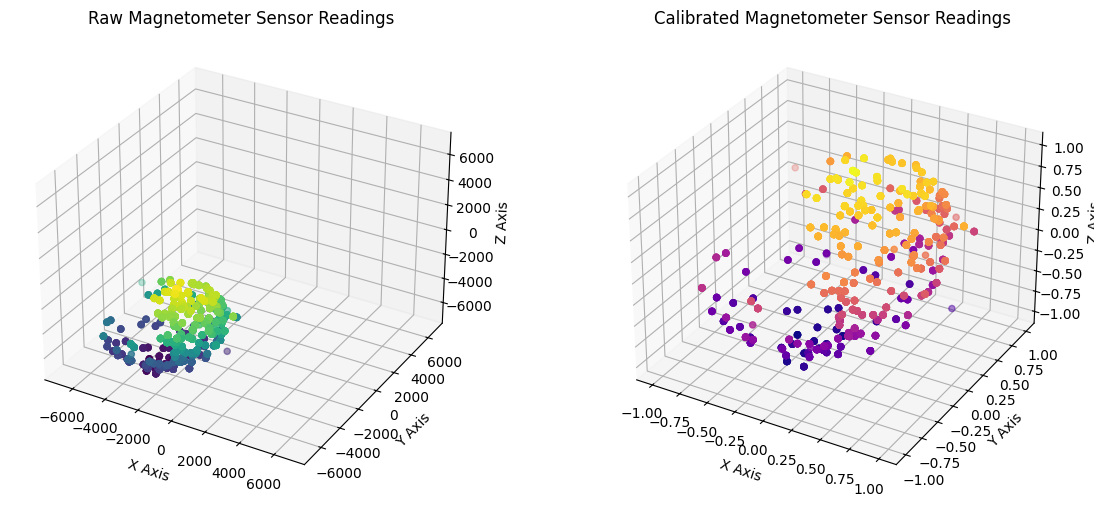

In [ ]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Import CSV stored on github.
# This could be your local computer directory
mag_raw = pd.read_csv('https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/ExampleData/magnetometer_raw.csv', sep=',')
mag_cal = pd.read_csv('https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/ExampleData/magnetometer_calibrated.csv', sep=',')

# Check format of data
#print(mag_raw)
#print(mag_cal)


# Create side by side subplots of readings
fig = plt.figure(figsize=(14, 6))

# Left plot (raw readings)
ax1 = fig.add_subplot(121, projection='3d')

# Plot the data as scatter plot
ax1.scatter(mag_raw['x'], mag_raw['y'], mag_raw['z'], c=mag_raw['z'], cmap='viridis')

# Ensure we have symetrical axis to help show the
# distortion in the measurments.  Our normalised
# readings will have symetrical axis values inherently.
largest_value = mag_raw[ ['x','y','z'] ].abs().max().max()
ax1.set_xlim(-largest_value, largest_value )
ax1.set_ylim(-largest_value, largest_value )
ax1.set_zlim(-largest_value, largest_value )

# Labels and title
ax1.set_xlabel('X Axis')
ax1.set_ylabel('Y Axis')
ax1.set_zlabel('Z Axis')
ax1.set_title('Raw Magnetometer Sensor Readings')

# Second plot on right (calibrated)
ax2 = fig.add_subplot(122, projection='3d')

# Plot the data
ax2.scatter(mag_cal['x'], mag_cal['y'], mag_cal['z'], c=mag_cal['z'], cmap='plasma')

# Labels and title
ax2.set_xlabel('X Axis')
ax2.set_ylabel('Y Axis')
ax2.set_zlabel('Z Axis')
ax2.set_title('Calibrated Magnetometer Sensor Readings')

# Show the plot
plt.show()

The above two plots show the range of raw (unprocessed) magnetometer readings taken from a 3Pi+ robot (left), and then the same values once they have been calibrated and normalised (right).  On the left, we can see how the magnetometer readings are clustered at an arbitrary point and range on the 3 axis.  After calibration and normalisation, the readings are centered and standardised on all axis to a range [ -1.0 : +1.0 ] - this is much easier to work with!  If we don't perform this calibration and normalisation, then if we try to compare the "magnitude" (size) of the readings across the x,y,z axis they will be at very different scales.  You can click "show code" to see how to make 3D plot like this, as well as review the example data stored in the .csv file format.

<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/exercise.png" align="left">  In Labsheet 2, you were encouraged to make a calibration routine where your robot rotated on the spot to measure `minimum`, `maximum` and `range` of the line sensors across the alternating black and white graphic.  In this exercise, your robot should rotate on the spot and collect magnetometer readings.  We expect these readings to be **both positive and negative**, so we will have to update the calibration process to normalise in the range [-1.0 : +1.0 ].  That means we need to know not only the range of the readings, but where the mid-point of the range is.



1. We will create the magnetometer calibration in the next exercise.  Let's take small steps.  First, integrate the magnetometer code from the previous exercise (just reading the magnetometer) with your line sensor calibration code (labsheet 2).  This should mean your robot will rotate, collect line sensor readings, and also just take magnetometer readings (`mag.read()`).  Check this works.


<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/info.png" align="left"> **Information:** It is recommended you create versions of your code.  The simplest way to do this is to save a current Arduino Sketch with a new suffix like `my_sketch_v2`, indicating it is the second version.  When chasing a horrible bug, you could completely ruin a good piece of code by mistake. Therefore, it is good to be able to go back to a previous version.



<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/stop.png" align="left"> **Caution:** If you are using Github (or other tools) to version your code, **your repository must be set to private**.  If other students access your repository and use your code - even without your knowing - the University will still consider your choice to make a public repository as sharing and therefore cheating - an academic offense.

 <img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/validate.png" align="left"> **Validate:** Check that your code for your line sensor calibration is still working as expected, even though this was a small addition.  

<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/exercise.png" align="left">  Review the below pseudocode to capture the calibration values for your magnetometer.  Pay attention to the extra requirements for a sensor that is reporting both positive and negative values.

<p align="center">
<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/pseudocode_calibrate_magnetometer.jpg">
</p>

1. Decide where you will write your calibration routine.  We want this to happen just once, when the robot turns on.  Therefore, somewhere in `setup()` makes sense.  You could encapsulate your calibration routine within a function that is called from `setup()`.

2. Create local variables to store the `minimum`, `maximum`, and `range` values for each axis.  We can use local variables as these can be temporary.   
- You can either use an array, like `float minimum[3];` or create individual variables like `float minimum_x, minimum_y, mimumum_z;`.

3. Create global variables for `offset` and `scaling` values.  These need to "be remembered" (persistent) through the operation of your robot.  Again, use either arrays or single variable instances.

4. Implement the two-step process indicated in the pseudocode above:
- First, capturing recent sensor readings whilst the robot rotates.
- Second, calculating the final calibration values to store.

 <img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/validate.png" align="left"> **Validate:** Use the Serial Monitor to check that your calibration routine is providing calibration values that are sensible.  For example, is the Offset value the mid-point of the mimimum and maximum values?  

<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/exercise.png" align="left">  Once you have the calibration routine, now test that you can apply the calibration values to your sensor readings.  When you apply these calibration values, the results are your new sensor readings.  We expect these sensor readings to now sit in the range [ -1.0 : +1.0 ] under normal circumstances (without the magnet).  Review the below pseudocode:

<p align="center">
<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/pseudocode_apply_calibration_magnetometer.jpg">
</p>

1. Write a new function that applies the calibration values as per the pseudocode above.  Give this function a useful name, such as `calcCalibratedMag()`.  
  - Remember that the `mag` instance of `LISM3MDL` is declared as a global variable, so you don't need to pass an argument to your function.  You can access `mag` anywhere in your top level code.
  - Instead of trying to return an array of your calibrated sensor readings from your function (for $Calibrated_{n}$, above), instead make a global variable(s).  In general, excessive use of global variables is bad practice.  However, we are also working with a small microcontroller system, and so we have a good overview of how our computer memory is being used.  It is recommended you get your solution working first, and then refactor the code to improve it later.  It helps to first come to understand the problem, and then work on making a more optimal or efficient solution afterwards.

 <img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/validate.png" align="left">  **Validate:** Use the Serial Monitor and Serial Plotter to check that your calibrated values are as expected, a value in the range of [-1.0 : +1.0 ].  You may notice that your values do sometimes exceed [ -1.0 : +1.0 ] - it is important to **analyse** and **evaluate** for yourself if the magnitude of this is significant - do you think it will effect the performance of your system?

<hr><br><br><br><br>

## Exercise 7: Detecting the Magnetic Puck

This section will guide you to find a solution to detect a magnet.  There are many possible ways to do this.  In the previous exercises we have validated that the magnetometer is working, and we have normalised the readings to be between [ -1.00 : +1.00 ].  The simplest way to detect the magnet is to look for when the magnitude of these readings exceeds our normalisation by a significant amount.  We can combine all three axis into a single measurement using the following equation:

<p align="center">
  $ m = \sqrt{ x_{c}^2 + y_{c}^2 + z_{c}^2 }$
</p>

where $m$ is the total magnitude measured, $x_{c}$ is our calibrated x axis reading, $y_{c}$ is our calibrated y axis reading and $z_{c}$ is our calibrated z axis reading.



<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/exercise.png" align="left">  **Exercise:** In this exercise we will experiment with the effect of the magnet on the reported value of $m$.  It is recommended that in this exercise you allow your robot to rotate to perform the initial calibration, and then test the magnetometer without the robot moving. You can either do this with `motors.setPWM(0,0);` (turning off the motors), or by lifting the robot off the surface slightly.  You can then slide the magnet provided to you across the surface towards the robot and observe the effect.

1. Implement the above equation into your current solution.  
2. Use Serial Print to report only the value of $m$ to the Serial Monitor or Serial Plotter.  
3. Decide what value of $m$ should be used to identify the presence of the magnet.  You could call this `detect_threshold` or similar.
4. Write an `if()` statement that will activate the Buzzer when the magnet is detected, and deactivate the buzzer when it is not detected.  
5. Use the noise of the buzzer to allow you to adjust the value of your `detect_threshold`.  Investigate how close or how far a distance your robot can reliably detect the magnet.

<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/observation.png" align="left"> **Observations:** Give special attention to where around the robot body the magnet is being detected.  Why is this?

<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/hypothesis.png" align="left">**Hypothesise:** What effect, if any, might the motors have on the magnetometer readings?  What likely causes would this be?    What would you expect to observe in the magnetometer readings?  What effects would you predict to observe in the context of detecting a magnet?  Do you predict a difference between  the robot being off the surface with motors active, compared to the robot on the surface with the motors active?  How might you conduct a simple test to observe and measure these effects?  <br><br><br>

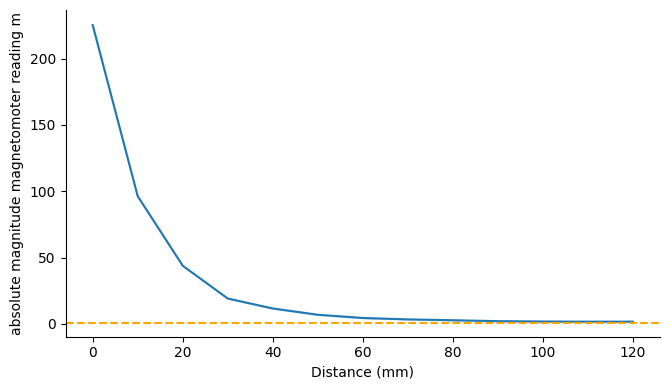

In [ ]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Import CSV stored on github.
# This could be your local computer directory
mag_dist = pd.read_csv('https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/ExampleData/magnetometer_distance.csv', sep=',')

rel_plot = sns.relplot( data=mag_dist, x="distance", y="m", kind="line", height=4, aspect=1.7)
# Add a dashed orange line at y=1.0
rel_plot.set_axis_labels("Distance (mm)", "absolute magnitude magnetomoter reading m")
plt.axhline(y=1.0, color='orange', linestyle='--')
plt.show()

<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/info.png" align="left"> **Information:** The above plot has been produced with just one 3Pi+ robot.  It should not be regarded as the "absolute truth" - rather, it is anecdotal.  Therefore, it is not a proven fact that all magnetometers will produce the plot above.  You should conduct your own investigations with your 3Pi+ robot.

<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/hypothesis.png" align="left">**Hypothesise:** After calibration we expect the nominal value of $m$ to be approximately in the range of [ 0.0 : 1.0 ].  The value 1.0 is shown as a dashed orange line on the above plot.  The above plot is produced from a 3Pi+, with the measurements taken with the magnet at the distance intervals marked on the x-axis.  We can see that left of 80mm, the value of $m$ begins to be greater than 1.0, which we take to mean the presence of a magnet.  What does the gradient of the plot relate to, in terms of the accuracy and precision of detecting a magnet?  What would we predict to observe in robot behaviour, if we set a detection threshold at various values relative to the above plot?  For example, what would be the observable impacts (i.e. what would we see if we were watching the robot?) of a threshold value of 2.0, compared to a threshold value of 15.0?

<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/exercise.png" align="left">  **Exercise:** Update your code to now allow your robot to move after calibration.  Program your robot to stop (`motors.setPWM(0,0);`) when it has detected the magnet.  You will also find it extremely useful if your robot makes a short beep sound when the threshold value is crossed - this way you will hear when the magnet has been detected, even if your robot movement is not what you expect.


1. Start with programming your robot to simply move forwards and then stop when $m$ grows larger than your threshold value (magnet detected).  
2. Once you are satisfied with (1), update your code to allow your robot to explore the environment from different starting positions, and again stop when it detects the magnet.

<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/observation.png" align="left"> **Observations:** Take the time to observe the stopping position of your robot relative to the magnet.  On which side of the robot is the magnet?  How close is the magnet? How much can you move the magnet to cause your robot to move again?

<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/validate.png" align="left"> **Validate:** In this exercise, we are using a fixed threshold value to determine whether there is a magnet present or not.  Conduct some tests to validate how reliable and robust your detection mechanism is.  You may also want to explore the effect of the speed of movement of your robot.

<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/hypothesis.png" align="left">**Hypothesise:** For the **Expert Difficulty** category of this assessment, your robot will need to move itself around the puck.  This means that the robot will need to estimate the location of the puck to be able to return to it.  At this stage, what information would be useful to collect and verify to estimate the location of the puck once it has been initially detected?

<img src="https://raw.githubusercontent.com/paulodowd/SEMTM0042_43/main/Images/exercise.png" align="left">  **Exercise:** As a final exercise for this labsheet, update your code so that when it has correctly detected the puck, it pushes the puck straight forwards to the edge of the coursework map.  Make sure that:



- Your robot pushes the puck to the edge of the map, but stops at the black line.